# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2024**


----

# Trabajo práctico entregable - parte 2


Trabajaremos con la base de datos de `melb_data` presentada a continuación.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn
seaborn.set_context('talk')

In [2]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  

[3 rows x 21 columns]

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


### Respuestas Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

Información del conjunto de datos del dataframe "melb_df"

In [3]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Seleccionamos todas las filas y columnas del conjunto de datos excepto **BuildinArea** y **YearBuilt**, este nuevo dataframe se llamará "melb_df2"

In [25]:
melb_df2 = melb_df.drop(columns=['YearBuilt', 'BuildingArea'])
melb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  CouncilArea    12211 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Para resolver este punto, vamos a utilizar las variables categoricas de interes encontradas en el **Entregable 1**, donde cambiamos "Address" por "Regionname"

In [35]:
interesting_columns_categ_to_encode = ['Suburb', 'Type', 'CouncilArea', 'Regionname','SellerG']

In [36]:
#Creamos todas las categóricas
counter = 0

for category in interesting_columns_categ_to_encode:
  counter += melb_df2[category].nunique()

print(f'El nuevo dataframe con one-hot enconding tendrá {counter} columnas categóricas adicionales')

El nuevo dataframe con one-hot enconding tendrá 626 columnas categóricas adicionales


Revisaremos también si de estas variables hay celdas nulas. De todas maneras, esto no debería representar un problema. Serán filas que tendrán cero en todas las opciones disponibles para esa categoría

In [39]:
melb_df2[interesting_columns_categ_to_encode].isna().sum()

Suburb            0
Type              0
CouncilArea    1369
Regionname        0
SellerG           0
dtype: int64

Para crear las variables binarias lo haremos con el método get_dummies. 

In [43]:
suburb_df = pd.get_dummies(melb_df2['Suburb'],prefix='Suburb', drop_first = False)
type_df = pd.get_dummies(melb_df2['Type'],prefix='Type', drop_first = False)
council_area_df = pd.get_dummies(melb_df2['CouncilArea'],prefix='CouncilArea', drop_first = False)
regionname_df = pd.get_dummies(melb_df2['Regionname'],prefix='RegionName', drop_first = False)
sellerG_df = pd.get_dummies(melb_df['SellerG'],prefix='SellerG', drop_first = False)

La resolución de este ejercicio pide también la codificación en one-hot de las variables numéricas. Veamos cuales son las variables numéricas con posibilidad de selección y realizaremos el mismo conteo de ampliación de la dimensión que para las categóricas

In [48]:
numerical_cols = ['Rooms', 'Price', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'Lattitude',
       'Longtitude', 'Propertycount']

counter = 0

for category in numerical_cols:
  counter += melb_df2[category].nunique()

print(f'El nuevo dataframe con one-hot enconding tendrá {counter} columnas numéricas adicionales')

El nuevo dataframe con one-hot enconding tendrá 17958 columnas numéricas adicionales


Vemos que codificar en one-hot tendría un crecimiento inmenso. Asimismo, para la mayoría de las variables numéricas no tiene sentido pues -algunas además de ser contínuas- representan lo esperado sin una transformación one-hot. Pensemos en la columna Price por ejemplo

In [49]:
melb_df2['Price'].nunique()

2204

Aplicando one-hot a esta columna no solo estamos añadiendo más de 2mil nuevas columnas, si no que no reviste demasiado sentido. Es correcto que el precio se muestre de la manera en la que está. Luego se podría ponderar según más barato o más caro y la elección de las personas para comprarla. 

Por esta razón tomaremos cuatro columnas con hasta 7 valores únicos que puede ser importante representarlas en one-hot y que no añaden gran dimensionalidad (14 nuevas columnas)

In [50]:
print(melb_df2['Rooms'].nunique())
print(melb_df2['Bathroom'].nunique())
print(melb_df2['Car'].nunique())

9
9
11


Volvemos a usar get_dummies para el encoding

In [51]:
rooms_df = pd.get_dummies(melb_df2['Rooms'],prefix='Rooms', drop_first = False)
bathroom_df = pd.get_dummies(melb_df2['Bathroom'],prefix='Bathroom', drop_first = False)
car_df = pd.get_dummies(melb_df2['Car'], prefix='Car', drop_first=False)

Ahora vamos a añadir las nuevas columnas -que están en otros dataframes- al dataframe original. Luego, eliminaremos la columna original, que dio lugar al encoding.
Primero las columnas categóricas

In [52]:
# Añadimos las variables binarias al DataFrame
melb_df2 = pd.concat([melb_df2, suburb_df, type_df, council_area_df, regionname_df], axis = 1)

# Eliminamos las columnas originales, que fueron reemplazadas por los encodings
melb_df2 = melb_df2.drop(columns=['Suburb', 'Type', 'CouncilArea', 'Regionname'])

Hacemos lo propio con las columnas numéricas

In [53]:
# Añadimos las variables binarias al DataFrame
melb_df2 = pd.concat([melb_df2, rooms_df, bathroom_df, car_df], axis = 1)

# Eliminamos las columnas originales, que fueron reemplazadas por los encodings
melb_df2 = melb_df2.drop(columns=['Rooms', 'Bathroom', 'Car'])

Veamos como quedó el dataframe modificado

In [54]:
melb_df2.head()

Address      Price Method SellerG       Date  Distance  Postcode  \
0      85 Turner St  1480000.0      S  Biggin  3/12/2016       2.5    3067.0   
1   25 Bloomburg St  1035000.0      S  Biggin  4/02/2016       2.5    3067.0   
2      5 Charles St  1465000.0     SP  Biggin  4/03/2017       2.5    3067.0   
3  40 Federation La   850000.0     PI  Biggin  4/03/2017       2.5    3067.0   
4       55a Park St  1600000.0     VB  Nelson  4/06/2016       2.5    3067.0   

   Bedroom2  Landsize  Lattitude  ...  Car_1.0  Car_2.0  Car_3.0  Car_4.0  \
0       2.0     202.0   -37.7996  ...     True    False    False    False   
1       2.0     156.0   -37.8079  ...    False    False    False    False   
2       3.0     134.0   -37.8093  ...    False    False    False    False   
3       3.0      94.0   -37.7969  ...     True    False    False    False   
4       3.0     120.0   -37.8072  ...    False     True    False    False   

   Car_5.0  Car_6.0  Car_7.0  Car_8.0  Car_9.0  Car_10.0  
0    False    False    False    False    False     False  
1    False    False    False    False    False     False  
2    False    False    False    False    False     False  
3    False    False    False    False    False     False  
4    False    False    False    False    False     False  

[5 rows x 399 columns]

In [55]:
melb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Columns: 399 entries, Address to Car_10.0
dtypes: bool(387), float64(8), object(4)
memory usage: 6.3+ MB


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

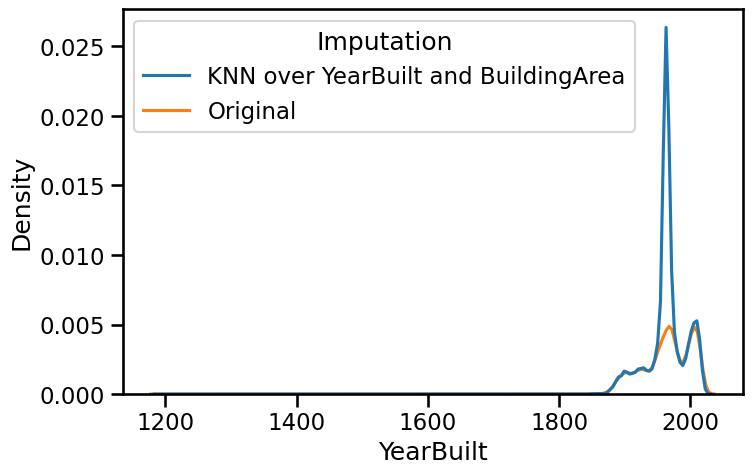

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Seleccione las primeras $2$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


Type=h  Type=t  Type=u  ...  Distance      pca1      pca2
0     1.0     0.0     0.0  ...       2.5 -7.669418 -0.292703
1     1.0     0.0     0.0  ...       2.5 -7.669418 -0.292703
2     1.0     0.0     0.0  ...       2.5 -7.620201  0.619633
3     1.0     0.0     0.0  ...       2.5 -7.620201  0.619633
4     1.0     0.0     0.0  ...       2.5 -7.570984  1.531969

[5 rows x 15 columns]

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de
     publicaciones de la plataforma AirBnB en el mismo código
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
